In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error


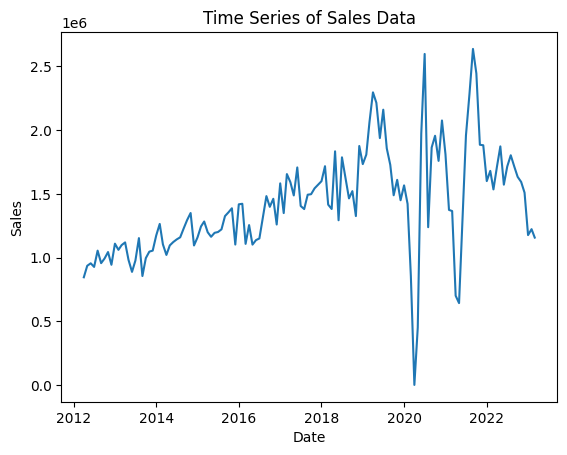

In [ ]:
# load the data
df = pd.read_excel('/content/Book2.xlsx', parse_dates=['Date'], index_col='Date')
# plot the time series of the original data
plt.plot(df.index, df['Sales'])
plt.title('Time Series of Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
# split data into train and test sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
#train.head()
test.head()

,Sales
Date,
2021-01-01,1810619.52
2021-02-01,1374913.30
2021-03-01,1365767.70
2021-04-01,701655.70
2021-05-01,643814.00


Text(0, 0.5, 'Sales (t-1)')

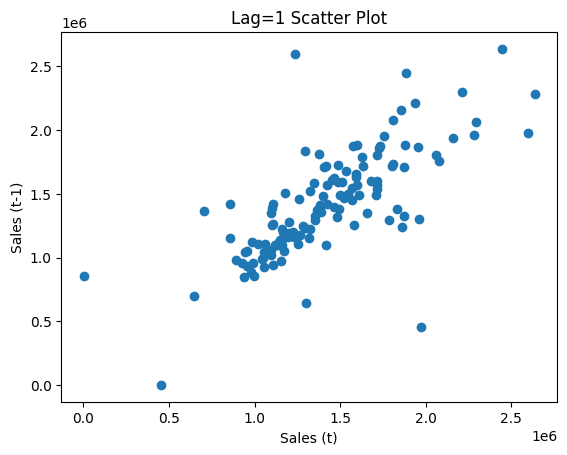

In [ ]:
# create a lagged version of the time series
lagged_data = pd.concat([df['Sales'], df['Sales'].shift(1)], axis=1)
lagged_data.columns = ['Sales', 'Sales_Lag1']

# remove missing values (first row)
lagged_data.dropna(inplace=True)

# plot the scatter plot
plt.scatter(lagged_data['Sales'], lagged_data['Sales_Lag1'])
plt.title('Lag=1 Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t-1)')


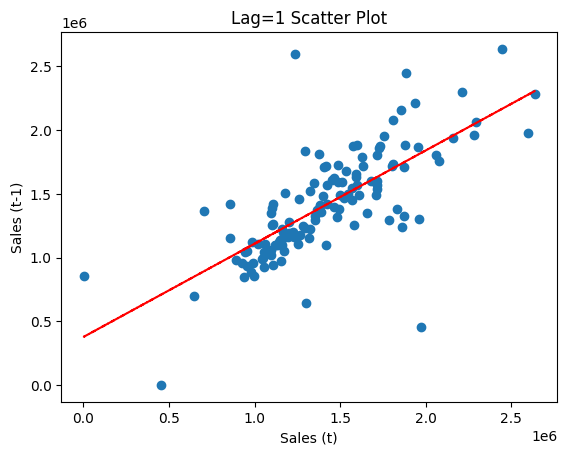

In [ ]:
# create a lagged version of the time series
lagged_data = pd.concat([df['Sales'], df['Sales'].shift(1)], axis=1)
lagged_data.columns = ['Sales', 'Sales_Lag1']

# remove missing values (first row)
lagged_data.dropna(inplace=True)

# plot the scatter plot
plt.scatter(lagged_data['Sales'], lagged_data['Sales_Lag1'])
plt.title('Lag=1 Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t-1)')

# add trend line
z = np.polyfit(lagged_data['Sales'], lagged_data['Sales_Lag1'], 1)
p = np.poly1d(z)
plt.plot(lagged_data['Sales'], p(lagged_data['Sales']), "r--")

plt.show()


In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
# load the data
df = pd.read_excel('/content/Book2.xlsx', parse_dates=['Date'], index_col='Date')
# plot the time series of the original data
plt.plot(df.index, df['Sales'])
plt.title('Time Series of Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
# split data into train and test sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
train.head()
test.head()
# create a lagged version of the time series
lagged_data = pd.concat([df['Sales'], df['Sales'].shift(1)], axis=1)
lagged_data.columns = ['Sales', 'Sales_Lag1']

# remove missing values (first row)
lagged_data.dropna(inplace=True)

# plot the scatter plot
plt.scatter(lagged_data['Sales'], lagged_data['Sales_Lag1'])
plt.title('Lag=1 Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t-1)')
# create a lagged version of the time series
lagged_data = pd.concat([df['Sales'], df['Sales'].shift(1)], axis=1)
lagged_data.columns = ['Sales', 'Sales_Lag1']

# remove missing values (first row)
lagged_data.dropna(inplace=True)

# plot the scatter plot
plt.scatter(lagged_data['Sales'], lagged_data['Sales_Lag1'])
plt.title('Lag=1 Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t-1)')

# add trend line
z = np.polyfit(lagged_data['Sales'], lagged_data['Sales_Lag1'], 1)
p = np.poly1d(z)
plt.plot(lagged_data['Sales'], p(lagged_data['Sales']), "r--")

plt.show()
# Fit MA model
model = ARIMA(train, order=(0, 0, 1))
results = model.fit()
# Evaluate model on test set
forecast = results.predict(start=len(train), end=len(df)-1, typ='levels')
forecast_mean_1 = pd.Series(forecast, index=test.index)
forecast_mean_1 = forecast_mean_1.apply(lambda x:'%.3f'%x)
# Calculate and print RMSE
mse = mean_squared_error(test, forecast_mean_1)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit Exponential Smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()
# Evaluate model on test set
forecast = results.forecast(steps=len(test))
forecast_mean_1 = forecast
forecast_ci = None
forecast_mean_1.apply(lambda x:'%.3f'%x)
# Calculate and print RMSE
mse = mean_squared_error(test, forecast_mean_1)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
results = model.fit()
# Evaluate model on test set
forecast = results.forecast(steps=len(test))
forecast_mean_1 = forecast[0]
forecast_ci = results.conf_int()
forecast_mean_1 = round(forecast_mean_1, 3)
# Get forecast values
forecast_values = pd.Series(forecast[0], index=test.index)
# Calculate RMSE
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)
print('RMSE:', round(rmse, 3))

#fit LSTM model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
# Define the number of time steps and features
n_steps = 10
n_features = 1
# Create input and output data for the model
def create_sequences(data, n_steps):
    X = []
    y = []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Generate predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: %.3f' % rmse)

# Perform grid search for SARIMA hyperparameters
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Print the selected hyperparameters
print(stepwise_model.order)
print(stepwise_model.seasonal_order)
# Fit SARIMA model with the selected hyperparameters
model = SARIMAX(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
results = model.fit()
print(results.summary())
# Evaluate model on test set
forecast = results.get_forecast(steps=len(test))
forecast_mean_1 = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean_1.apply(lambda x: '%.3f' % x)
# Calculate RMSE on test set
mse = mean_squared_error(test, forecast_mean_1)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
# Plot forecast and actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(forecast_mean_1, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.2)
plt.legend(loc='upper left')
plt.show()
# Set the frequency of the index explicitly
df.index.freq = 'MS'

# Fit SARIMA model using the entire dataset with the selected hyperparameters
model = SARIMAX(df, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
results = model.fit()

future_dates = pd.date_range(start='2023-04-01', end='2025-03-01', freq='MS')
future = pd.DataFrame(index=future_dates, columns=df.columns)
forecast = results.forecast(steps=len(future))
forecast_mean_2 = forecast
forecast_ci = results.get_forecast(steps=len(future)).conf_int()

# Print the predicted mean values
print(forecast_mean_2.apply(lambda x: '%.3f' % x))
# Plot forecast and actual values
plt.figure(figsize=(10, 6))
plt.plot(df, label='Training data')
plt.plot(forecast_mean_2, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.2)
plt.legend(loc='upper left')
plt.show()